# Aircraft Operations Challenge

#Q1:
Using appropriate topographical maps and historical METAR records, explain through Python calculations carried out in a Jupyter notebook (and appropriate commentary), why the runway has the orientation it does (see the ‘True bearing’ entry in the table).


Part 1: Creating a wind rose for EGHI based on METAR data.
Import numpy to get pi and matplotlib to create the wind rose.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Using the given METAR filename, read each METAR's wind bearing and strength (from 13th character to 15th and from the 16th to the 18th respectively) thereby cutting out airport name, reading date and also weather information.
Next, remove variable wind readings as they do not contribute to finding out the prevailing wind direction and convert the bearings and windspeeds to the radial format.

In [2]:
def getwind(filename):
    eghi = open(str(filename), "r")
    data = eghi.readlines()
    eghi.close

    readings = len(data)
    bearing_deg = []
    windspeed_kts = []
    theta_rad = []
    radii = []

    for x in range(0, readings):

        bearing_deg.append(str(data[x][13:16]))
        windspeed_kts.append(data[x][16:18])

        if bearing_deg[x] == "VRB":
            theta_rad.append(0)
            radii.append(int(windspeed_kts[x]))

        else:
            theta_rad.append((180 - int(bearing_deg[x])) / 360 * 2 * np.pi)
            radii.append(int(windspeed_kts[x]))

    return bearing_deg, windspeed_kts, theta_rad, radii, readings

Finally, present the readings in a polar diagram using matplotlib to show direction and magnitude for each reading. Colours will be used for each reading to represent magnitude.

In [3]:
def windrose(filename):

    theta_rad = getwind(filename)[2]
    radii = getwind(filename)[3]
    readings = getwind(filename)[4]

    colors = []
    for x in range(0, readings):
        colors.append(plt.cm.viridis(radii[x] / 25.))

    width = 1/6 
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.bar(theta_rad, radii, width, bottom=0.0, color=colors, alpha=0.5)

    plt.show()
    print("Recorded wind at EGHI for each bearing.")

Running the function using the METAR file provided on blackboard should give a wind rose for EGHI

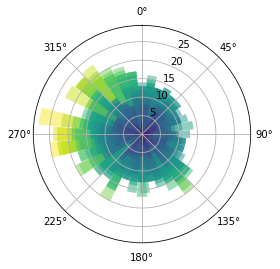

Recorded wind at EGHI for each bearing.
None


In [4]:
print(windrose("eghi_year.methist"))

The strongest and most prevalent winds at the site of Southampton Airport are shown to be from the West, around the bearing of 270 degrees. It would therefore make sense to build the runway facing this direction to give aircraft taking off and landing the most headwind possible, therefore minimising ground speed at take off and landing and maximising safety. However, due to the presence of a river and existing roadways before the construction of the airport, the runway was constrained to a bearing of 200 degrees.

Southampton Airport is located at 44ft of elevation, a dip in the terrain surrounded to the SouthEast and West by hills at altitudes of 100ft - 250ft. It can be theorised that this creates a funneling effect, channeling winds to approach the airport from a SouthWesterly direction.

![EGHIgeography.png](https://i.postimg.cc/3wDfqqv9/EGHIgeography.png)

Crosswinds should not affect operations more than 5% of the time, let's verify this for EGHI.


Firstly, find the crosswind component relative to the runway for each reading at EGHI.
* I was unable to install ADRpy so calculated the following using the math module

In [5]:
def crosswinds(filename):

    #Define unit vector in the direction of runway 2.
    runway_bearing = 200
    runway_vector = runway_bearing, 1

    readings = getwind(filename)[4]
    theta_rad = getwind(filename)[2]
    radii = getwind(filename)[3]

    crosswind_angle = []
    crosswind_component = []
    
    for x in range(0, readings):
        
        crosswind_angle.append(theta_rad[x] - (runway_bearing / 360 * 2 * np.pi))
        crosswind_component.append(abs(radii[x] * math.sin(crosswind_angle[x])))

    return crosswind_component, crosswind_angle

Next, plot the crosswind components recorded for winds of each direction in a polar plot for visualisation using matplotlib again.

In [6]:
def crosswindrose(filename):

    crosswind_theta = crosswinds(filename)[1]
    crosswind_radii = crosswinds(filename)[0]

    colors = []
    for x in range(0, len(crosswind_theta)):
        colors.append(plt.cm.viridis(crosswind_radii[x] / 25.))

    width = 1/6
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.bar(crosswind_theta, crosswind_radii, width, bottom=0.0, color=colors, alpha=0.5)

    plt.show()
    print("0 degree mark is aligned with runway 20.")

Applying the algorithm to the data for EGHI to get the crosswinds relative to runway 20.

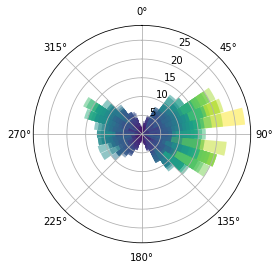

0 degree mark is aligned with runway 20.


In [7]:
crosswindrose("eghi_year.methist")

Note that the magnitude of most readings is less than the maximum velocity recorded on the wind rose, as the runway at EGHI is optimally aligned to face the prevailing winds.
When taking off on runway 20 as is done 70% of the time according to Southampton Airport's website, the maximum crosswind encountered in the dataset is at 28kts. This enables aircraft to take advantage of headwinds for takeoff and landing while minimising the crosswind component.

The Airbus A320 has a max demonstrated crosswind limit of 38kts (gusts included)


The ATR 72-600 which operates at EGHI has a max demonstrated crosswind limit of 35kts


The Cessna 172 has a max demonstrated crosswind limit of 15kts



Excluding gusts, this makes EGHI suitable for chartered flights. General aviation is capable of operating from the runway depending on the weather.

# Q2:
The numbers 02 and 20 are painted on each end of the runway. What numbers will you see there if you overfly the airport in the year 2050?

The true headings of runways 02/20 are 021/201 degrees as of 2020.
In Section 6 - Aerodromes (SESA1015 lectures), the annual magnetic declination of EGHI is given to be 0.15 degrees East.
Runways are names after the magnetic bearing they follow, rounded to two significant figures.
With this information, the following function can be used to calculate the designation of the runway a given number of years into the future.

In [8]:
def future_runway(current_bearing, magnetic_declination, years):

    new_bearing = current_bearing + magnetic_declination * years

    current_runway = int(round(current_bearing, -1) / 10)
    new_runway = int(round(new_bearing, -1) / 10)

    print("Runway",current_runway,"currently has a bearing of",current_bearing,". In",years,"years, it will be designated Runway",new_runway,"with a bearing of",new_bearing)

Plug in the values for runways 02/20:

In [9]:
future_runway(21, 0.15, 30)
future_runway(201, 0.15, 30)

Runway 2 currently has a bearing of 21 . In 30 years, it will be designated Runway 3 with a bearing of 25.5
Runway 20 currently has a bearing of 201 . In 30 years, it will be designated Runway 21 with a bearing of 205.5


In 2050, magnetic declination will have altered the designation of runway 02/20 to 03/21

# Q3: EGHI features.

Runway 02:

TORA: 1723m (Red)

TODA: 1831m (Orange)

ASDA: 1723m (Blue)

LDA: 1650m (Green)

![EGHI02.png](https://i.postimg.cc/LXtC9Zv1/EGHI02.png)

Runway 20:

TORA: 1650m (Red)

TODA: 1805m (Orange)

ASDA: 1650m (Blue)

LDA: 1605m (Green)

![EGHI20.png](https://i.postimg.cc/V6QZPF9w/EGHI20.png)